In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

c:\Users\Nidou\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


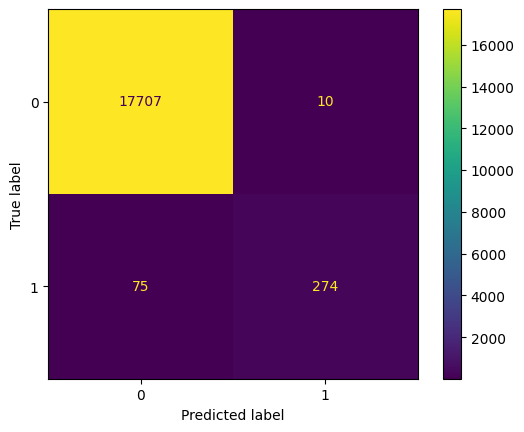

In [3]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Diabetes_model = LogisticRegression()
Diabetes_model.fit(X_train, y_train)

y_pred = Diabetes_model.predict(X_test)
evaluation = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix= evaluation )
display.plot()
plt.show()


In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print ('Precision score before tuning:', precision)
print ('Recall score before tuning:', recall)
print ('F1-score score before tuning:', f1)

Precision score before tuning: 0.9647887323943662
Recall score before tuning: 0.7851002865329513
F1-score score before tuning: 0.8657187993680885


In [5]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'C' : [0.01, 0.1, 1, 10, 100],
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear'],
    'class_weight' : [None, 'balanced']
    }

grid = GridSearchCV(LogisticRegression(random_state= 42), parameter_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)



c:\Users\Nidou\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nidou\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nidou\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nidou\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataC

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='recall')

In [6]:
print('the best paramneter', grid.best_params_)
print('the best recall', grid.best_score_)

the best paramneter {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
the best recall 0.918768461713247


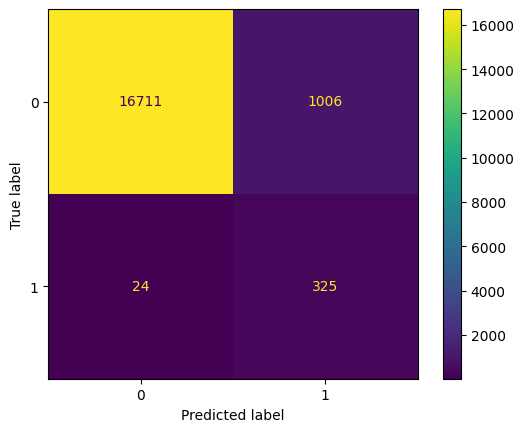

In [7]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

cm_tuned = confusion_matrix(y_test, y_pred)
display_tuned = ConfusionMatrixDisplay(confusion_matrix= cm_tuned)
display_tuned.plot()
plt.show()

In [8]:
precision_tuned = precision_score(y_test, y_pred)
recall_tuned = recall_score(y_test, y_pred)
f1_tuned = f1_score(y_test, y_pred)

print('Precision score after tuning:', precision_tuned)
print('Recall score after tuning:', recall_tuned)
print('F1-score after tuning:', f1_tuned)

Precision score after tuning: 0.24417731029301276
Recall score after tuning: 0.9312320916905444
F1-score after tuning: 0.3869047619047619


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=50, n_estimators= 400, max_depth = None, min_samples_leaf= 1, min_samples_split= 2, criterion= 'gini')
rf_model.fit(X_train, y_train)


c:\Users\Nidou\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=400, random_state=50)

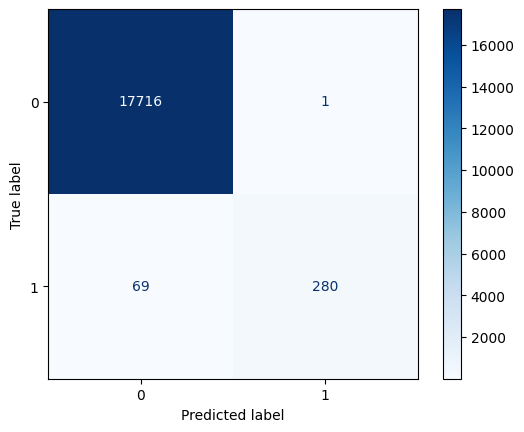

Precision (RF): 0.99644128113879
Recall (RF): 0.8022922636103151
F1-score (RF): 0.8888888888888888


In [10]:
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.show()

print('Precision (RF):', precision_score(y_test, y_pred_rf))
print('Recall (RF):', recall_score(y_test, y_pred_rf))
print('F1-score (RF):', f1_score(y_test, y_pred_rf))

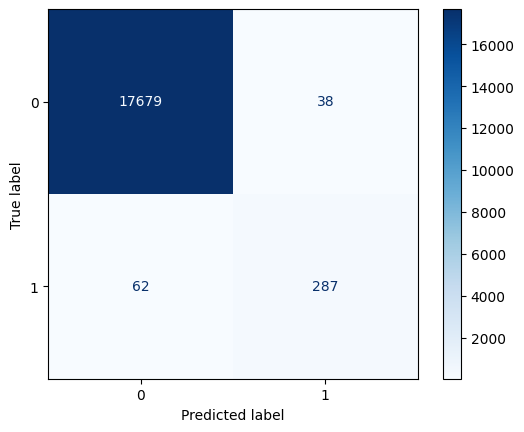

Recall score with lower threshold: 0.8223495702005731
Precision score with lower threshold: 0.8830769230769231
F1-score score with lower threshold: 0.8516320474777448


In [11]:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  
threshold = 0.2                          
y_pred_rf_thresh = (y_proba_rf >= threshold).astype(int)  

cm_rf_thresh = confusion_matrix(y_test, y_pred_rf_thresh)
disp_rf_thresh = ConfusionMatrixDisplay(confusion_matrix=cm_rf_thresh)
disp_rf_thresh.plot(cmap='Blues')
plt.show()

print('Recall score with lower threshold:', recall_score(y_test, y_pred_rf_thresh))
print('Precision score with lower threshold:', precision_score(y_test, y_pred_rf_thresh))
print('F1-score score with lower threshold:', f1_score(y_test, y_pred_rf_thresh))

In [20]:
from sklearn.svm import SVC
 
SVM = SVC(kernel = 'linear', random_state= 42)
SVM.fit(X_train, y_train)

c:\Users\Nidou\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

Precision score before tuning: 0.9891304347826086
Recall score before tuning: 0.7822349570200573
F1-score score before tuning: 0.8736


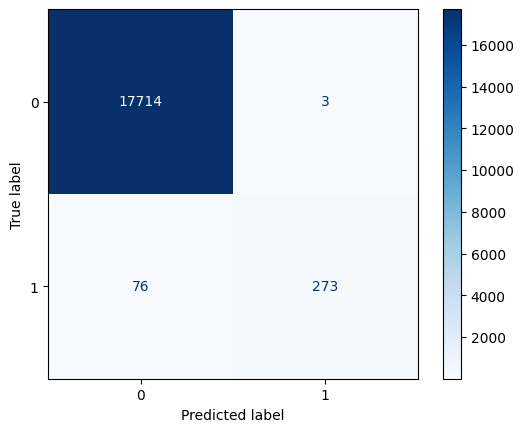

In [21]:
y_pred_svm = SVM.predict(X_test)
cm_SVM = confusion_matrix(y_test, y_pred_svm)
dis_cm_svm = ConfusionMatrixDisplay(confusion_matrix= cm_SVM)
dis_cm_svm.plot(cmap = 'Blues')
plt.show

print ('Precision score before tuning:', precision_score(y_test, y_pred_svm))
print ('Recall score before tuning:', recall_score(y_test, y_pred_svm))
print ('F1-score score before tuning:', f1_score(y_test, y_pred_svm))

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

SVM_grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid, scoring='recall', cv=5)
SVM_grid.fit(X_train, y_train.values.ravel())

print("Best parameters:", SVM_grid.best_params_)
print("Best recall (CV):", SVM_grid.best_score_)


best_svm = SVM_grid.best_estimator_
y_pred_svm_tuned = best_svm.predict(X_test)

print('Precision (SVM tuned):', precision_score(y_test, y_pred_svm_tuned))
print('Recall (SVM tuned):', recall_score(y_test, y_pred_svm_tuned))
print('F1-score (SVM tuned):', f1_score(y_test, y_pred_svm_tuned))

Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
Best recall (CV): 0.9101795046580321
Precision (SVM tuned): 0.28420123565754635
Recall (SVM tuned): 0.9226361031518625
F1-score (SVM tuned): 0.43454790823211875


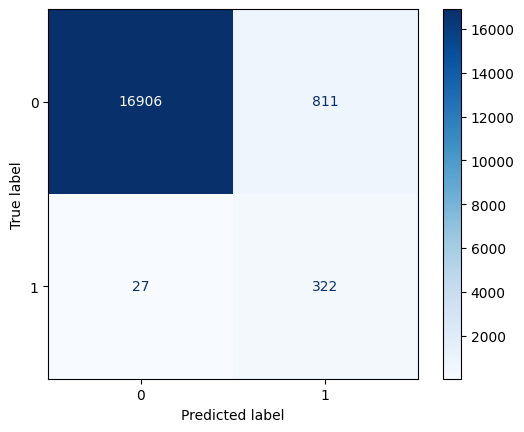

In [ ]:
cm_svm_tuned = confusion_matrix(y_test, y_pred_svm_tuned)
disp_svm_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_svm_tuned)
disp_svm_tuned.plot(cmap='Blues')
plt.show()